In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/bank-additional-full.csv',delimiter = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Pre Processing

In [ ]:
# drop kolom duration
df.drop(columns='duration',inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
# cek null di dalam kolom
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# melihat balance dari y
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
# melihat describe data
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='y', ylabel='count'>

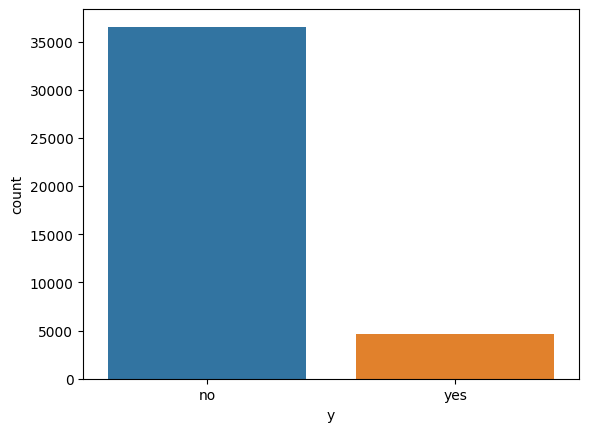

In [ ]:

sns.countplot(x='y',data = df)

Histogram for the numerical features :



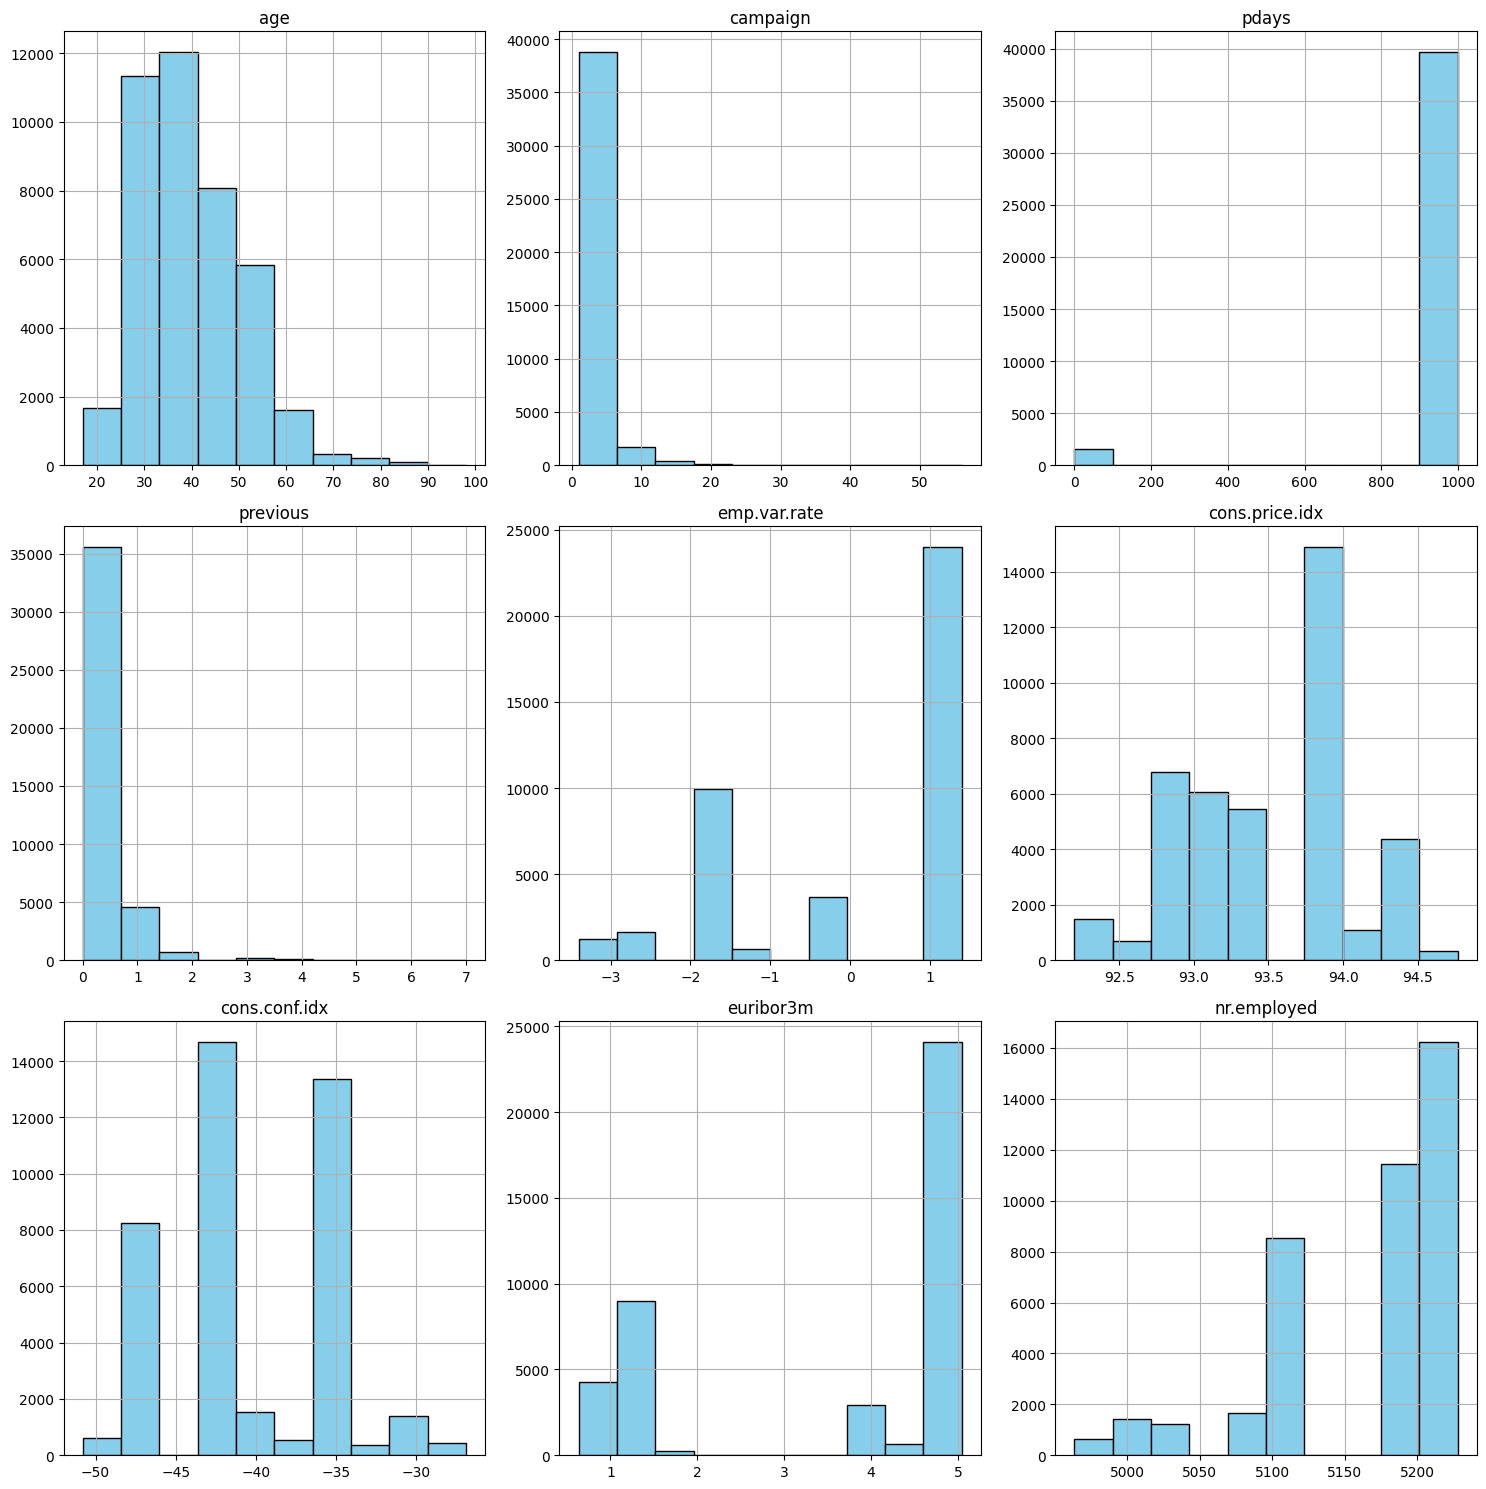

In [ ]:
# melihat
print("Histogram for the numerical features :\n")
df.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Loop untuk mengkodekan kolom-kolom bertipe objek
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
x = df.iloc[:, :-1]  # Memilih semua kolom kecuali kolom terakhir (target) untuk X
y = df.iloc[:, -1]   # Memilih kolom terakhir (target) untuk y

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# standarisasi features(x)
sc=StandardScaler()
sc.fit_transform(x)

array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [ ]:
# split data menjadi train dan test
x_trainlG,x_testlG,y_trainlG,y_testlG =  train_test_split(x, y, test_size=0.3, random_state=2)

In [ ]:
model_logReg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model_logReg.fit(x_trainlG, y_trainlG)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [ ]:
y_predlG = model_logReg.predict(x_testlG)

In [ ]:
print(classification_report(y_testlG, y_predlG))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10954
           1       0.73      0.18      0.29      1403

    accuracy                           0.90     12357
   macro avg       0.82      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [ ]:
cm = confusion_matrix(y_testlG,y_predlG)
cm

array([[10858,    96],
       [ 1147,   256]])

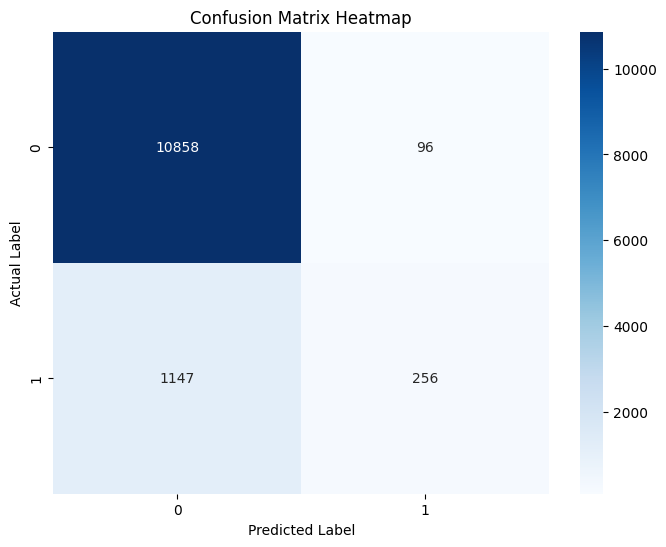

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_sm, y_sm = sm.fit_resample(x, y)

In [ ]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.25,random_state=2)

In [ ]:
lr=LogisticRegression(penalty = 'l1',solver = 'liblinear')
lr.fit(x_train_sm,y_train_sm)
pred_lr=lr.predict(x_test_sm)
print(classification_report(y_test_sm, pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      9188
           1       0.77      0.74      0.76      9086

    accuracy                           0.76     18274
   macro avg       0.76      0.76      0.76     18274
weighted avg       0.76      0.76      0.76     18274



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# split data menjadi train dan test
X_trainK, X_testK, y_trainK, y_testK = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainK, y_trainK)
    pred_i = knn.predict(X_testK)
    error.append(np.mean(pred_i != y_testK))

Text(0, 0.5, 'Error mean')

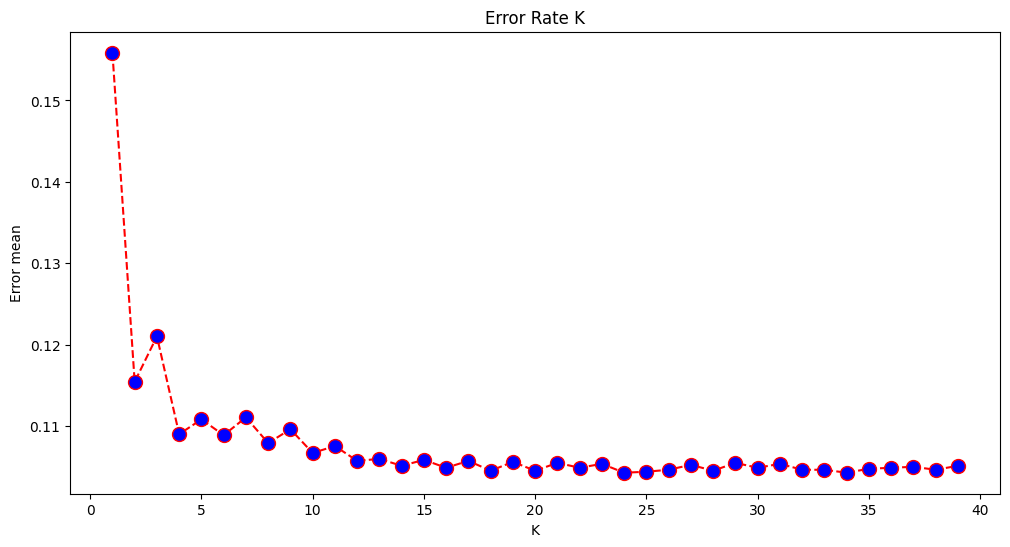

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24)

#Train the model using the training sets
knn.fit(X_trainK, y_trainK)

#Predict the response for test dataset
y_predK = knn.predict(X_testK)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testK, y_predK))

Accuracy: 0.8957271182325808


In [ ]:
# Mencoba menggunakan SMOTE
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sm, y_train_sm)
    pred_i = knn.predict(x_test_sm)
    error.append(np.mean(pred_i != y_test_sm))

Text(0, 0.5, 'Error mean')

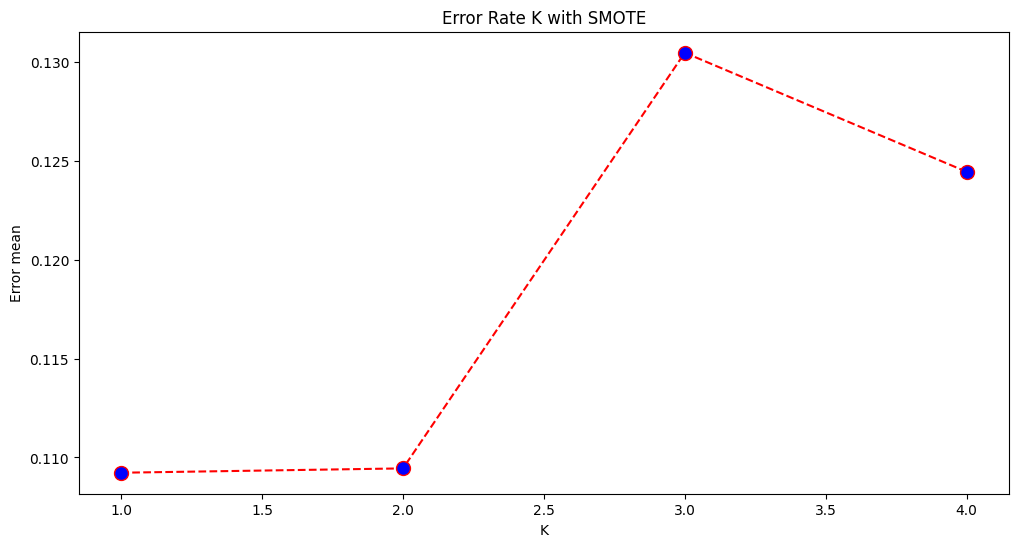

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K with SMOTE')
plt.xlabel('K')
plt.ylabel('Error mean')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(x_train_sm, y_train_sm)

#Predict the response for test dataset
y_predK_SMOTE = knn.predict(x_test_sm)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_sm, y_predK_SMOTE))
print(classification_report(y_test_sm, y_predK_SMOTE))

Accuracy: 0.8907737769508591
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      9188
           1       0.84      0.96      0.90      9086

    accuracy                           0.89     18274
   macro avg       0.90      0.89      0.89     18274
weighted avg       0.90      0.89      0.89     18274



# SVM

In [ ]:
from sklearn import svm

In [ ]:
# split data menjadi train dan test
X_trainSvm, X_testSvm, y_trainSvm, y_testSvm = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [ ]:
# Membuat Model svm
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
svm_model.fit(X_trainSvm,y_trainSvm)
y_predSvm = svm_model.predict(X_testSvm)
print("Accuracy:",metrics.classification_report(y_testSvm, y_predSvm))


Accuracy:               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7279
           1       0.57      0.22      0.32       959

    accuracy                           0.89      8238
   macro avg       0.74      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [ ]:
# Menggunakan SMOTE
svm_model_SMOTE = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_model_SMOTE.fit(x_train_sm,y_train_sm)
y_predSvm_SMOTE = svm_model_SMOTE.predict(x_test_sm)
print("Accuracy:",metrics.classification_report(y_test_sm, y_predSvm_SMOTE))


Accuracy:               precision    recall  f1-score   support

           0       0.67      0.92      0.77      9188
           1       0.87      0.53      0.66      9086

    accuracy                           0.73     18274
   macro avg       0.77      0.73      0.72     18274
weighted avg       0.77      0.73      0.72     18274



# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# split data menjadi train dan test
X_trainDt, X_testDt, y_trainDt, y_testDt = train_test_split(x, y, test_size=0.3, random_state=1)



clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainDt,y_trainDt)

#Predict the response for test dataset
y_predDt = clf.predict(X_testDt)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_testDt, y_predDt))

Accuracy: 0.8372582341992393


In [ ]:
# menggunakan SMOTE
dtc_model_SMOTE = DecisionTreeClassifier()
dtc_model_SMOTE.fit(x_train_sm,y_train_sm)
y_preddtc_SMOTE = dtc_model_SMOTE.predict(x_test_sm)
print("Accuracy:",metrics.classification_report(y_test_sm, y_preddtc_SMOTE))



Accuracy:               precision    recall  f1-score   support

           0       0.90      0.87      0.89      9188
           1       0.87      0.90      0.89      9086

    accuracy                           0.89     18274
   macro avg       0.89      0.89      0.89     18274
weighted avg       0.89      0.89      0.89     18274



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# split dataset train and test
x_trainRf,x_testRf,y_trainRf,y_testRf = train_test_split(x,y, test_size = 0.2,random_state = 202)
# train model
rf=RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_trainRf,y_trainRf)

# prediction on test set
y_predRf=rf.predict(x_testRf)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testRf, y_predRf))

Accuracy: 0.8891721291575625


In [ ]:
print(classification_report(y_testRf, y_predRf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7323
           1       0.50      0.29      0.37       915

    accuracy                           0.89      8238
   macro avg       0.71      0.63      0.65      8238
weighted avg       0.87      0.89      0.88      8238



In [ ]:
# random forest SMOTE
# menggunakan SMOTE
rf_model_SMOTE = RandomForestClassifier(n_estimators=100)
rf_model_SMOTE.fit(x_train_sm,y_train_sm)
y_predrf_SMOTE = rf_model_SMOTE.predict(x_test_sm)
print("Accuracy:",metrics.classification_report(y_test_sm, y_predrf_SMOTE))



Accuracy:               precision    recall  f1-score   support

           0       0.92      0.93      0.93      9188
           1       0.93      0.92      0.93      9086

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274



<!-- Naive Bayes -->

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Memisahkan data menjadi set train dan test
X_trainNb, X_testNb, y_trainNb, y_testNb = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Naive Bayes (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
naive_bayes_model.fit(X_trainNb, y_trainNb)

# Memprediksi kelas pada set uji
y_predNb = naive_bayes_model.predict(X_testNb)


In [ ]:
print(classification_report(y_testNb, y_predNb))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7303
           1       0.34      0.50      0.41       935

    accuracy                           0.83      8238
   macro avg       0.64      0.69      0.65      8238
weighted avg       0.86      0.83      0.85      8238



In [ ]:
# menggunakan SMOTE
nb_model_SMOTE = GaussianNB()
nb_model_SMOTE.fit(x_train_sm,y_train_sm)
y_prednb_SMOTE = nb_model_SMOTE.predict(x_test_sm)
print("Accuracy:",metrics.classification_report(y_test_sm, y_prednb_SMOTE))



Accuracy:               precision    recall  f1-score   support

           0       0.72      0.78      0.75      9188
           1       0.76      0.70      0.73      9086

    accuracy                           0.74     18274
   macro avg       0.74      0.74      0.74     18274
weighted avg       0.74      0.74      0.74     18274



# Perbandingan antar Model

In [ ]:
print("Logistic Regression:", metrics.accuracy_score(y_testlG, y_predlG))
print("Decision Tree:", metrics.accuracy_score(y_testDt, y_predDt))
print("Random Forest:", metrics.accuracy_score(y_testRf, y_predRf))
print("SVM:", metrics.accuracy_score(y_testSvm, y_predSvm))
print("Naive Bayes:", metrics.accuracy_score(y_testNb, y_predNb))
print("KNN:", metrics.accuracy_score(y_testK, y_predK))

Logistic Regression: 0.8994092417253379
Decision Tree: 0.8372582341992393
Random Forest: 0.8923282350084972
SVM: 0.889900461277009
Naive Bayes: 0.8326050012138869
KNN: 0.8957271182325808


Bisa dilihat dari ke enam model yang telah dibuat akurasi skor yang paling tinggi ada pada model logistic regression yaitu  0.899 atau bisa dibulatkan menjadi 0.9 atau 90%. Lalu model KNN berada di posisi ke dua dengn akurasi 0.895. Dan ketiga ada Random forest dengan akurasi 0.892

Selanjutnya kita bandingkan ke enam model dengan data yang telah dilatih menggunakan SMOTE

In [ ]:
print("Logistic Regression:", metrics.accuracy_score(y_test_sm, pred_lr))
print("Decision Tree:", metrics.accuracy_score(y_test_sm,  y_preddtc_SMOTE))
print("Random Forest:", metrics.accuracy_score(y_test_sm, y_predrf_SMOTE))
print("SVM:", metrics.accuracy_score(y_test_sm, y_predSvm_SMOTE))
print("Naive Bayes:", metrics.accuracy_score(y_test_sm, y_prednb_SMOTE))
print("KNN:", metrics.accuracy_score(y_test_sm, y_predK_SMOTE))

Logistic Regression: 0.763160774871402
Decision Tree: 0.8867790303162963
Random Forest: 0.9276567801247674
SVM: 0.7292875123125753
Naive Bayes: 0.7392470176206632
KNN: 0.8907737769508591


terjadi perbedaan pada hasil keenam model, dengan data yang kita train menggunakan SMOTE.

Bisa dilihat urutan pertama untuk akurasi paling tinggi di pegang oleh random forest dengan akurasi 0.92. Dan di posisi kedua ada KNN model dengan akurasi 0.89. Dan untuk ketiga ada Decision tree model dengan sor 0.886


Selain itu, kita bisa lihat antara model yang tidak menggunakan SMOTE dan menggunakan SMOTE, setiap model ada perbedaan. Ada model yang meningkat jika menggunakan SMOTE conthnya random forest. Dan ada juga yang akurasi nya melemah seperti mode di logistic regression